In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_real_dataset='/home/emmanuel/Dropbox/Statistics/DataAnalysis/NS_Simulations_554.dat' 
path_artificial_4fits='/home/emmanuel/Dropbox/Statistics/DataAnalysis/Generated_NS_Dataset_7480points.dat' 
# path_artificial_4fits='/home/emmanuel/Dropbox/Statistics/DataAnalysis/Generated_NS_Dataset_2620points.dat' #Less points
path_artificial_13fits='/home/emmanuel/Dropbox/Statistics/DataAnalysis/Generated_NS_Dataset_2048points.dat' 

real_data = pd.read_csv(path_real_dataset)
real_data = real_data.astype(float)
real_data = real_data.dropna()
# artificial_data_4 = pd.read_csv(path_artificial_4fits)
# artificial_data_4 = artificial_data_4.astype(float)
# artificial_data_4 = artificial_data_4.dropna()
artificial_data_13 = pd.read_csv(path_artificial_13fits)
artificial_data_13 = artificial_data_13.astype(float)
artificial_data_13 = artificial_data_13.dropna()

data=artificial_data_13# dataframe to train
#We change 'final-mass' to Erad to see what happens
data[["Erad"]]=1-data[["final-mass"]]
real_data[["Erad"]]=1-real_data[["final-mass"]]

In [3]:
import joblib
#rf_regressor = joblib.load("rf_regressor_generated_NS_Dataset_7480points.joblib")
#rf_regressor = joblib.load("./rf_regressor_generated_NS_Dataset_2048points.joblib")
rf_regressor = joblib.load("./rf_regressor_Erad_generated_NS_Dataset_2048points.joblib")
# rf_regressor = joblib.load("./rf_regressor_generated_NS_Dataset_7480points+real_dataset.joblib")

## Separate data

In [64]:
#Use this cell when working with the generated dataset
column1,column3='e','initial_m1'
# data=data2
data=data.sort_values(column1)

separation_classes=np.unique(round(data['initial-separation'],1).values)
column3_classes=np.unique(data[column3].values)
print(column3_classes)

sep11=separation_classes[0]#small separation = separation_classes[3]
sep246=separation_classes[1]
initial_m20,initial_m41,initial_m43,initial_m50=0.2,0.41,0.43,0.5

fixed_m50=data[data[column3]==initial_m50]
fixed_m43=data[data[column3]==initial_m43]
fixed_m41=data[data[column3]==initial_m41]
fixed_m20=data[data[column3]==initial_m20]
fixed_m12=data[data[column3]==0.12]
#fixed_parameter=fixed_parameter[fixed_parameter[column2]>0.92]#filter one point with non usual final-mass 

fixed_sep11_m50=fixed_m50[round(fixed_m50['initial-separation'],0)==sep11]
fixed_sep25_m41=fixed_m41[round(fixed_m41['initial-separation'],1)==sep246]
fixed_sep11_m43=fixed_m43[round(fixed_m43['initial-separation'],0)==sep11]
fixed_sep11_m20=fixed_m20[round(fixed_m20['initial-separation'],0)==sep11]
fixed_sep246_m50=fixed_m50[round(fixed_m50['initial-separation'],1)==sep246]
fixed_sep246_m12=fixed_m12[round(fixed_m12['initial-separation'],1)==sep246]

[0.12 0.14 0.17 0.2  0.25 0.29 0.33 0.38 0.41 0.43 0.44 0.5 ]


In [65]:
def plot(x,prediction,y=None,x_name='e',y_name='Erad',name_to_save=None):
    fig, axs = plt.subplots(1,1,figsize=(14,8))
    axs.grid(True)
    if type(y)==np.ndarray: plt.scatter(x, y ,marker='.',label='dataset')
    
    plt.plot(x, prediction,ls='dotted',c='crimson',label='predicted curve')
    
    plt.title(x_name+' vs '+y_name+' Random Forest predictions')
    axs.legend(loc='best')
    axs.set_xlabel(x_name)
    axs.set_ylabel(y_name)
    
    if name_to_save: 
        plt.savefig(name_to_save+'.png')
    else:
        plt.show()
    return

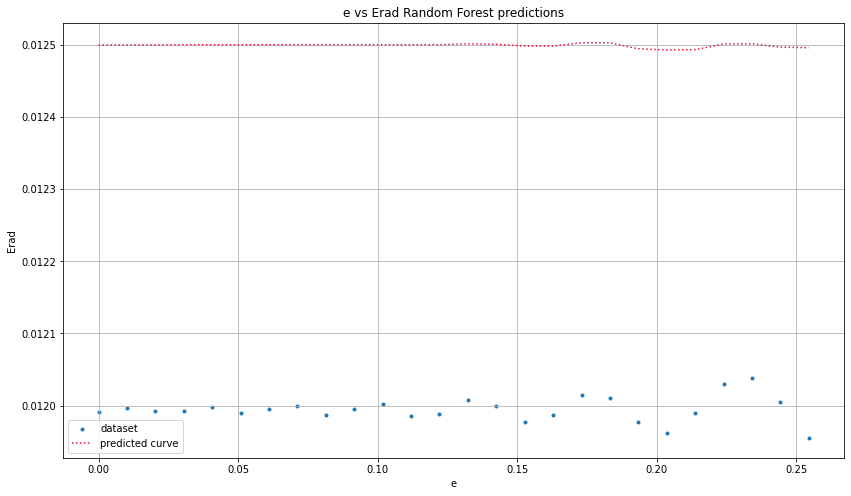

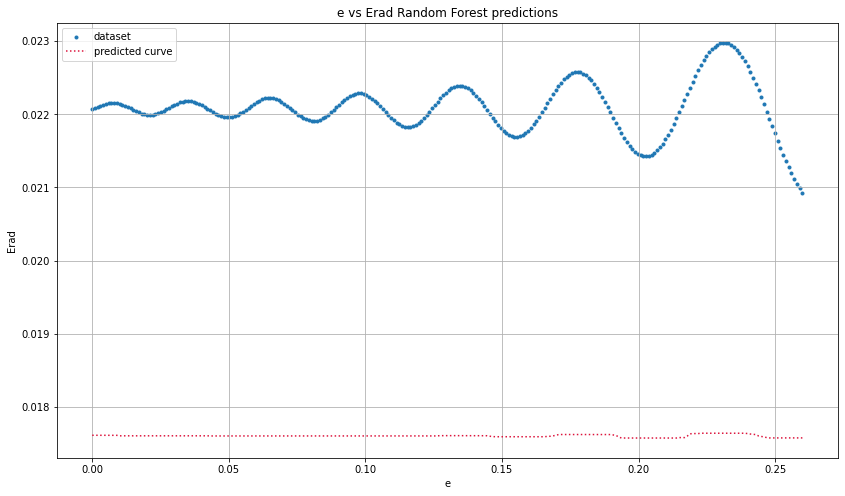

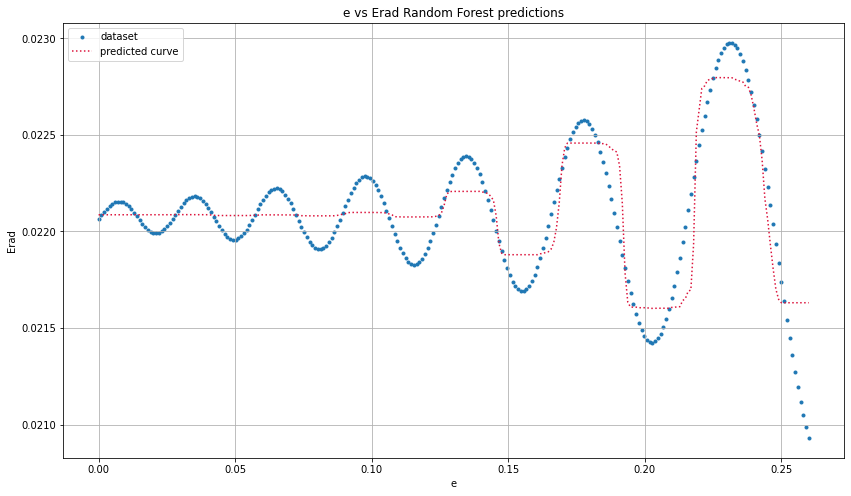

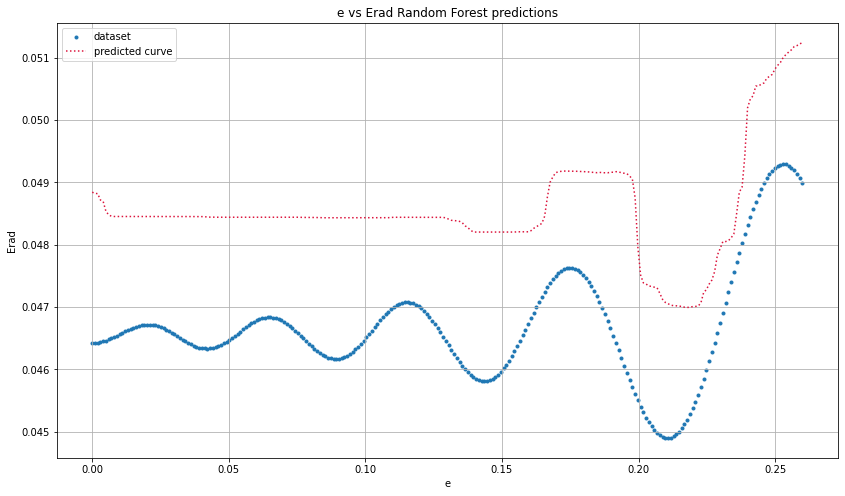

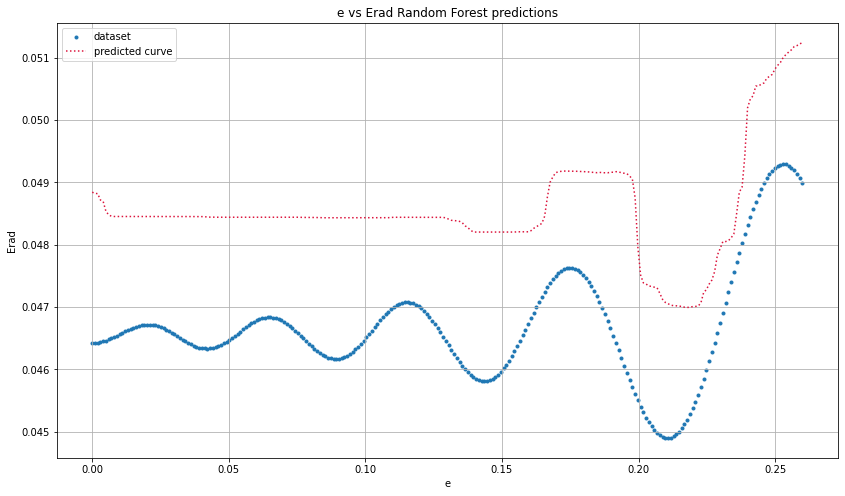

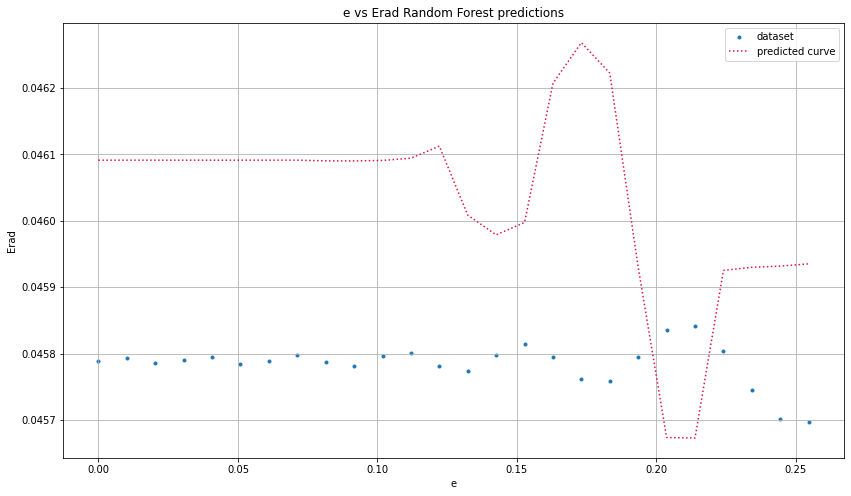

In [6]:
# And predict on new data                                
x_axis=[]
list_s11_m12=[]
list_s11_m17=[]
list_s12_m20=[]
list_s11_m41=[]
list_s11_m44=[]
list_s11_m45=[]



#Construct lists with new parameters
fixed_sep246_m12=fixed_sep246_m12[fixed_sep246_m12['e']<=0.26]
for index, row in fixed_sep246_m12.iterrows():
    list_s11_m12.append([row['initial_m1'], row['e'], 11 ,row['#orbits']])

for index, row in fixed_sep11_m20.iterrows():
    list_s11_m17.append([0.17, row['e'], row['initial-separation'],row['#orbits']])

for index, row in fixed_sep11_m20.iterrows():
    list_s12_m20.append([row['initial_m1'], row['e'], 12 ,row['#orbits']])

fixed_sep25_m41=fixed_sep25_m41[fixed_sep25_m41['e']<=0.26]
for index, row in fixed_sep25_m41.iterrows():
    list_s11_m41.append([row['initial_m1'], row['e'], 11 ,row['#orbits']])

for index, row in fixed_sep11_m43.iterrows():
    list_s11_m44.append([0.44, row['e'], row['initial-separation'],row['#orbits']])

for index, row in fixed_sep11_m43.iterrows():
    list_s11_m45.append([0.45, row['e'], row['initial-separation'],row['#orbits']])

    
    
#Do predictions on the new lists    
df_s11_m12=pd.DataFrame(list_s11_m12,columns=['initial_m1','e','initial-separation','#orbits'])
prediction_s11_m12=rf_regressor.predict(df_s11_m12)

df_s11_m17=pd.DataFrame(list_s11_m17,columns=['initial_m1','e','initial-separation','#orbits'])
prediction_s11_m17=rf_regressor.predict(df_s11_m17)

df_s12_m20=pd.DataFrame(list_s12_m20,columns=['initial_m1','e','initial-separation','#orbits'])
prediction_s12_m20=rf_regressor.predict(df_s12_m20)

df_s11_m44=pd.DataFrame(list_s11_m44,columns=['initial_m1','e','initial-separation','#orbits'])
prediction_s11_m44=rf_regressor.predict(df_s11_m44)

df_s11_m45=pd.DataFrame(list_s11_m45,columns=['initial_m1','e','initial-separation','#orbits'])
prediction_s11_m45=rf_regressor.predict(df_s11_m45)

df_s11_m41=pd.DataFrame(list_s11_m41,columns=['initial_m1','e','initial-separation','#orbits'])
prediction_s11_m41=rf_regressor.predict(df_s11_m41)

#Plot results
plot(fixed_sep246_m12['e'].values,np.ravel(prediction_s11_m12),fixed_sep246_m12['Erad'].values,x_name='e',y_name='Erad')
plot(fixed_sep11_m20['e'].values,np.ravel(prediction_s11_m17),fixed_sep11_m20['Erad'].values,x_name='e',y_name='Erad')
plot(fixed_sep11_m20['e'].values,np.ravel(prediction_s12_m20),fixed_sep11_m20['Erad'].values,x_name='e',y_name='Erad')
plot(fixed_sep11_m43['e'].values,np.ravel(prediction_s11_m44),fixed_sep11_m43['Erad'].values,x_name='e',y_name='Erad')
plot(fixed_sep11_m43['e'].values,np.ravel(prediction_s11_m45),fixed_sep11_m43['Erad'].values,x_name='e',y_name='Erad')
plot(fixed_sep25_m41['e'].values,np.ravel(prediction_s11_m41),fixed_sep25_m41['Erad'].values,x_name='e',y_name='Erad')


In [78]:
def poly2_damped_oscillator(t,amplitude,f1,f2,phase,decay,k):#,amplitude2,frequency2,phase2,decay2
    return amplitude*np.exp(decay*t)*np.cos(f1*t+f2*t**2 + phase)+k

from lmfit import Model

def plot_with_fit(df,function, guess,x_axis='e',y_axis='Erad',name_to_save=False):
    
    fig, axs = plt.subplots(1,1,figsize=(14,8))
    
    prediction=rf_regressor.predict(df)
    
    plt0=axs.scatter(df[x_axis], prediction,c=df['#orbits'],marker='.')
    dmodel=Model(function)
    params = dmodel.make_params(**guess)
    result = dmodel.fit(prediction, params, t=df[x_axis])
    print(result.best_values)

    mass_label=str(np.unique(round(df.loc[:,['initial_m1']],2))[0])
    s_label=str(np.unique(round(df.loc[:,['initial-separation']],0))[0])
    axs.plot(df[x_axis], function(df[x_axis],**result.best_values),ls='dotted',label='m1='+mass_label+',s0='+s_label)

    cb0=fig.colorbar(plt0,label="n orbits")
    axs.set_xlabel(x_axis)
    axs.set_ylabel(y_axis)
    plt.legend(loc='best')
    if name_to_save: 
        plt.savefig(name_to_save+'.png')
    else:
        plt.show()
    return result.best_values

In [77]:
def check_with_real_data(test_df,function,params,name_to_save=False):
    fig, axs = plt.subplots(1,1,figsize=(14,8))
    e_values=np.arange(0,0.26,0.01)
    #real dataset plot
    axs.scatter(test_df['e'], test_df['Erad'],label='dataset')#test_df.columns[0]+'='+str(round(test_df['initial_m1'].iloc[0],2)))##
    #prediction plot
    axs.plot(e_values, function(e_values,**params),ls='dotted',label='$s_0=11 ,m1_0=0.45$')
    
    axs.set_xlabel("e")
    axs.set_ylabel("Erad")
    plt.grid(True)
    plt.legend()
    if name_to_save: 
        plt.savefig(name_to_save+'.png')
    else:
        plt.show()
    return

### $m_1=0.45$

{'amplitude': 2.9560164618456482e-05, 'f1': -113.1930405374113, 'f2': 61.00348289400667, 'phase': 68.65859745715186, 'decay': 18.03223808203666, 'k': 0.04844349009834871}


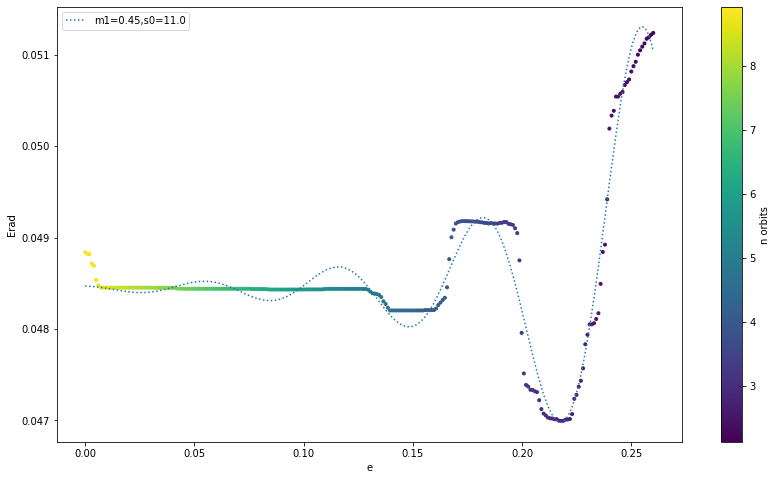

In [10]:
x_zoomed=[df_s11_m45]

k=rf_regressor.predict(df_s11_m45[df_s11_m45['e']==0])[0]
guess = {'amplitude':7.6286e-05,'f1':-245.331354,'f2':317.499654,'phase':86.8443,'decay':10.5249962,'k':k}
guesses=[guess]

for i in range(len(x_zoomed)):
    best_value_param=plot_with_fit(x_zoomed[i],poly2_damped_oscillator,guesses[i])#,name_to

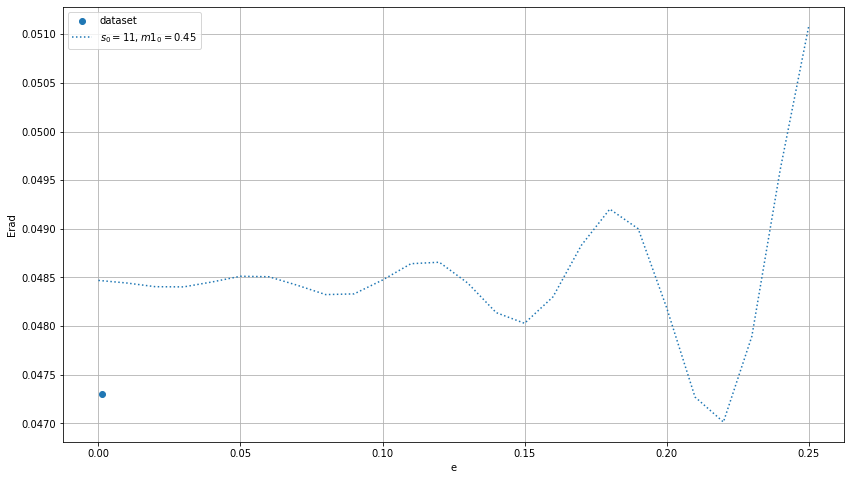

In [11]:
test_df=real_data[round(real_data['initial_m1'],2)==0.45]
# test_df=test_df[test_df['e']<=0.26]
check_with_real_data(test_df,poly2_damped_oscillator,best_value_param)#name_to_save='prediction_s11_from_m1_0.43_to_0.45'

In [28]:
error=(abs(poly2_damped_oscillator(0,**best_value_param)/test_df['Erad'].values[0])-1)*100

print('Error is %',round(error,3))

Error is % 2.466


### $m_1=0.17$

{'amplitude': -2.0065394858217432e-06, 'f1': -227.50994359958005, 'f2': 260.88697891727105, 'phase': 85.73237559930249, 'decay': 12.65055115589139, 'k': 0.017607714873160114}


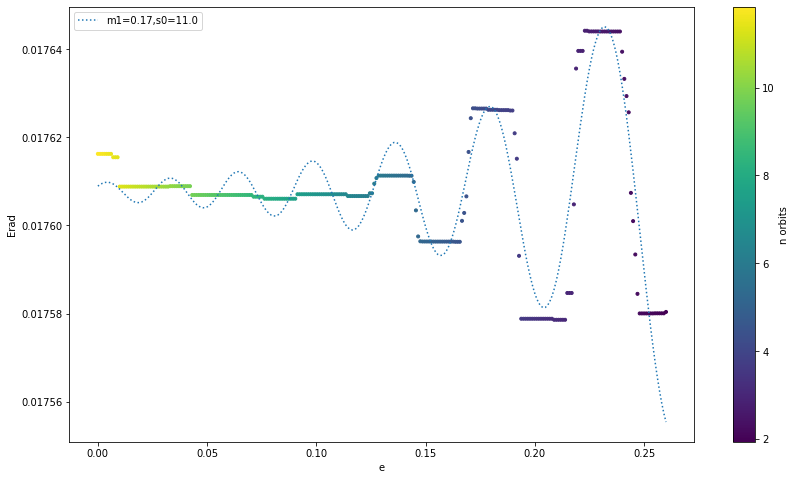

In [12]:
x_zoomed=[df_s11_m17]

k=rf_regressor.predict(df_s11_m17[df_s11_m17['e']==0])[0]
guess = {'amplitude':7.6286e-05,'f1':-245.331354,'f2':317.499654,'phase':86.8443,'decay':10.5249962,'k':k}
guesses=[guess]

for i in range(len(x_zoomed)):
    best_value_param=plot_with_fit(x_zoomed[i],poly2_damped_oscillator,guesses[i])#,name_to

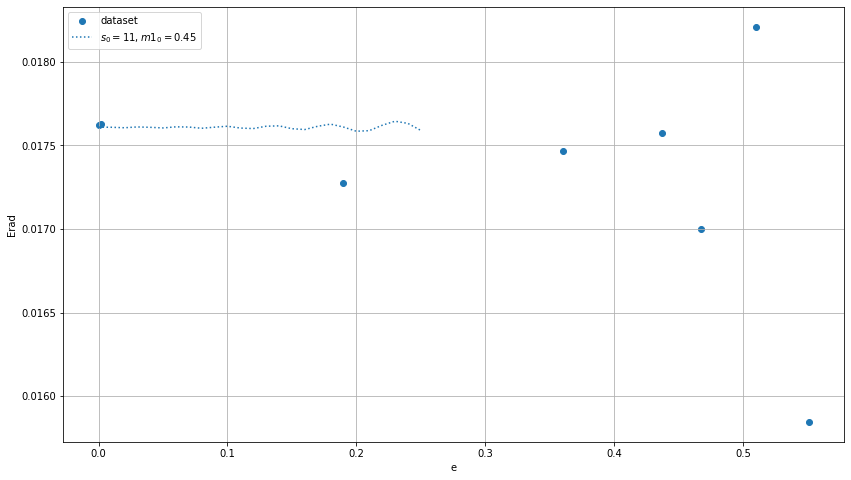

In [15]:
test_df=real_data[round(real_data['initial_m1'],2)==0.17]
test_df=test_df[test_df['e']<=0.56]
check_with_real_data(test_df,poly2_damped_oscillator,best_value_param)#name_to_save='prediction_s11_from_m1_0.43_to_0.45'

In [28]:
error=(abs(poly2_damped_oscillator(0,**best_value_param)/test_df['Erad'].values[0])-1)*100

print('Error is %',round(error,3))

Error is % 2.466


### $m_1=0.12$

{'amplitude': -5.111649005459279e-07, 'f1': -154.55542564010636, 'f2': 69.83467533767578, 'phase': 78.86572735498528, 'decay': 9.142004955747653, 'k': 0.012499064655766657}


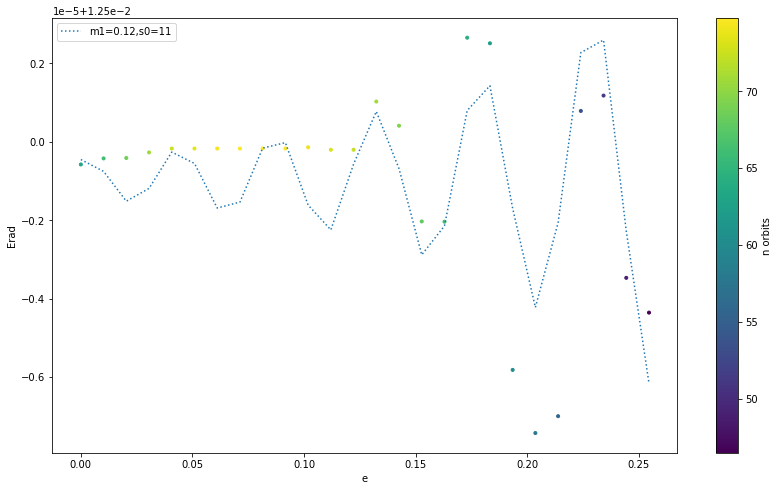

In [51]:
x_zoomed=[df_s11_m12]

k=rf_regressor.predict(df_s11_m12[df_s11_m12['e']==0])[0]
guess = {'amplitude':7.6286e-05,'f1':-245.331354,'f2':317.499654,'phase':86.8443,'decay':10.5249962,'k':k}
guesses=[guess]

for i in range(len(x_zoomed)):
    best_value_param=plot_with_fit(x_zoomed[i],poly2_damped_oscillator,guesses[i])#,name_to

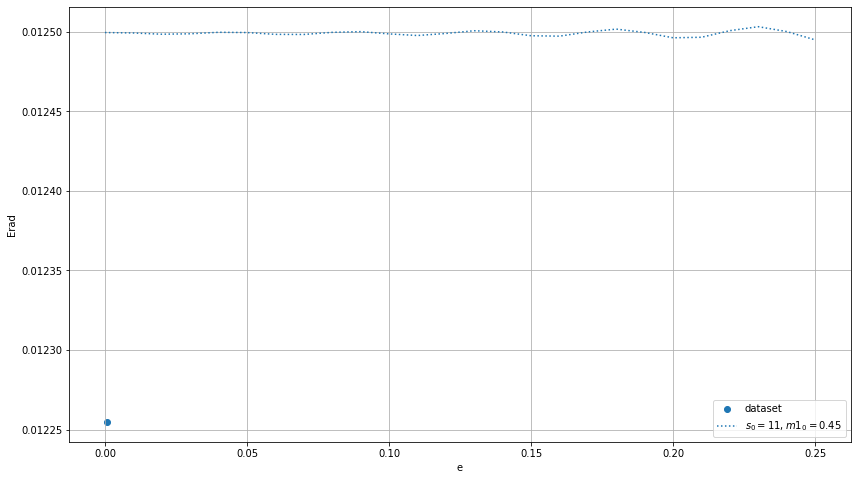

In [ ]:
test_df=real_data[round(real_data['initial_m1'],2)==0.12]
test_df=test_df[test_df['initial-separation']<=12]
check_with_real_data(test_df,poly2_damped_oscillator,best_value_param)#name_to_save='prediction_s11_from_m1_0.43_to_0.45'

In [54]:
error=(abs(poly2_damped_oscillator(0,**best_value_param)/test_df['Erad'].values[0])-1)*100

print('Error is %',round(error,3))

Error is % 1.997


## Comparison against Healy,Lousto,Zlochower2014

In [9]:
def risco(a):
    Z1=1+(1-a**2)**(1/3)*((1+a)**(1/3)+(1-a)**(1/3))
    Z2=(3*a**2+Z1**2)**(1/2)
    return 3+Z2-np.sign(a)*((3-Z1)*(3+Z1+2*Z2))**(1/2)

def Eisco(a):
    return (1-2/risco(a)+a/risco(a)**(3/2))/np.sqrt(1-3/risco(a)+2*a*risco(a)**(3/2))

def Mrem_formula(m1,m=1):
    m2=m-m1
    delta_m=(m1-m2)/m
    eta=m1*m2/m**2
    fitting_constants=[0.951507,
                    1.995246,
                    2.98099]
    
    [M0,K2d,K4f]=fitting_constants
    
    Mrem_m=M0+K2d*delta_m**2+K4f*delta_m**4
    
    square_eta=(4*eta)**2*Mrem_m
    linear_eta=(1+eta*(Eisco(0)+11))*delta_m**6
    
    return m*(square_eta+linear_eta)

In [7]:
e_classes=np.unique(round(real_data['e'],2).values)
sim_by_e={}
for e in e_classes:
    temp=real_data[round(real_data['e'],2)==round(e,2)]
    
    sim_by_e.update({str(round(e,2)):len(temp)})
    
print('initial-m1 classes',sim_by_e)

initial-m1 classes {'0.0': 39, '0.01': 12, '0.02': 8, '0.03': 3, '0.04': 4, '0.05': 4, '0.06': 6, '0.07': 4, '0.08': 6, '0.09': 4, '0.1': 6, '0.11': 4, '0.12': 6, '0.13': 4, '0.14': 7, '0.15': 3, '0.16': 7, '0.17': 4, '0.18': 7, '0.19': 14, '0.2': 7, '0.21': 4, '0.22': 5, '0.23': 3, '0.24': 7, '0.25': 4, '0.26': 1, '0.27': 3, '0.28': 3, '0.3': 4, '0.33': 1, '0.35': 4, '0.36': 12, '0.39': 1, '0.4': 5, '0.41': 2, '0.42': 1, '0.43': 1, '0.44': 13, '0.45': 2, '0.46': 1, '0.47': 13, '0.48': 1, '0.49': 1, '0.5': 6, '0.51': 14, '0.52': 3, '0.53': 1, '0.54': 3, '0.55': 12, '0.56': 3, '0.57': 1, '0.58': 15, '0.59': 1, '0.6': 4, '0.62': 12, '0.64': 14, '0.65': 1, '0.66': 12, '0.7': 16, '0.75': 14, '0.8': 16, '0.84': 14, '0.88': 12, '0.9': 4, '0.91': 14, '0.94': 12, '0.96': 14, '0.98': 12, '0.99': 18, '1.0': 38}


In [26]:
sorted(sim_by_e.items(),key=lambda x:x[1],reverse=True)

[('0.0', 39),
 ('1.0', 38),
 ('0.99', 18),
 ('0.7', 16),
 ('0.8', 16),
 ('0.58', 15),
 ('0.19', 14),
 ('0.51', 14),
 ('0.64', 14),
 ('0.75', 14),
 ('0.84', 14),
 ('0.91', 14),
 ('0.96', 14),
 ('0.44', 13),
 ('0.47', 13),
 ('0.01', 12),
 ('0.36', 12),
 ('0.55', 12),
 ('0.62', 12),
 ('0.66', 12),
 ('0.88', 12),
 ('0.94', 12),
 ('0.98', 12),
 ('0.02', 8),
 ('0.14', 7),
 ('0.16', 7),
 ('0.18', 7),
 ('0.2', 7),
 ('0.24', 7),
 ('0.06', 6),
 ('0.08', 6),
 ('0.1', 6),
 ('0.12', 6),
 ('0.5', 6),
 ('0.22', 5),
 ('0.4', 5),
 ('0.04', 4),
 ('0.05', 4),
 ('0.07', 4),
 ('0.09', 4),
 ('0.11', 4),
 ('0.13', 4),
 ('0.17', 4),
 ('0.21', 4),
 ('0.25', 4),
 ('0.3', 4),
 ('0.35', 4),
 ('0.6', 4),
 ('0.9', 4),
 ('0.03', 3),
 ('0.15', 3),
 ('0.23', 3),
 ('0.27', 3),
 ('0.28', 3),
 ('0.52', 3),
 ('0.54', 3),
 ('0.56', 3),
 ('0.41', 2),
 ('0.45', 2),
 ('0.26', 1),
 ('0.33', 1),
 ('0.39', 1),
 ('0.42', 1),
 ('0.43', 1),
 ('0.46', 1),
 ('0.48', 1),
 ('0.49', 1),
 ('0.53', 1),
 ('0.57', 1),
 ('0.59', 1),
 ('0.65'

In [ ]:
#Use this cell when working with the generated dataset
real_data=real_data.sort_values('initial_m1')

e0_data=real_data[round(real_data['e'],2)==0]
e1_data=real_data[round(real_data['e'],2)==1]
e7_data=real_data[round(real_data['e'],2)==0.7]
e8_data=real_data[round(real_data['e'],2)==0.8]
e58_data=real_data[round(real_data['e'],2)==0.58]
e19_data=real_data[round(real_data['e'],2)==0.19]
e51_data=real_data[round(real_data['e'],2)==0.51]

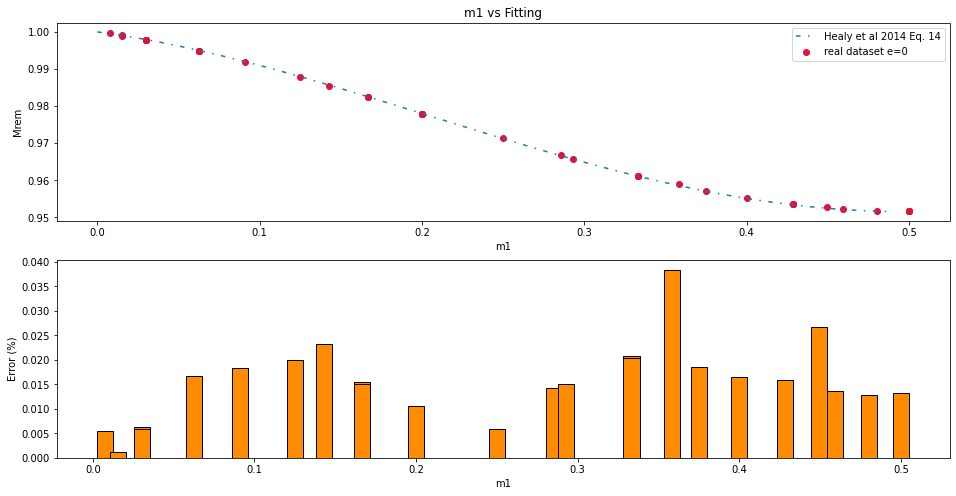

In [60]:
fig, ax = plt.subplots(2,1,figsize=(16,8))
m1_values=np.arange(0,0.5,0.01)
ax[0].plot(m1_values, Mrem_formula(m1_values), label='Healy et al 2014 Eq. 14',ls=(0, (3, 5, 1, 5)),zorder=2)
ax[0].scatter(e0_data['initial_m1'],e0_data['final-mass'],c='crimson',label='real dataset e=0')

ax[0].set_title('m1 vs Fitting')
ax[0].set_xlabel('m1')
# ax.set_ylim([0,1])
ax[0].set_ylabel('Mrem')
ax[0].legend(loc='best')
ax[1].bar(e0_data['initial_m1'], abs((e0_data['final-mass']/Mrem_formula(e0_data['initial_m1'])-1)*100),color='darkorange',width=0.01,edgecolor='black')
ax[1].set_xlabel('m1')
ax[1].set_ylabel('Error (%)')
plt.show()

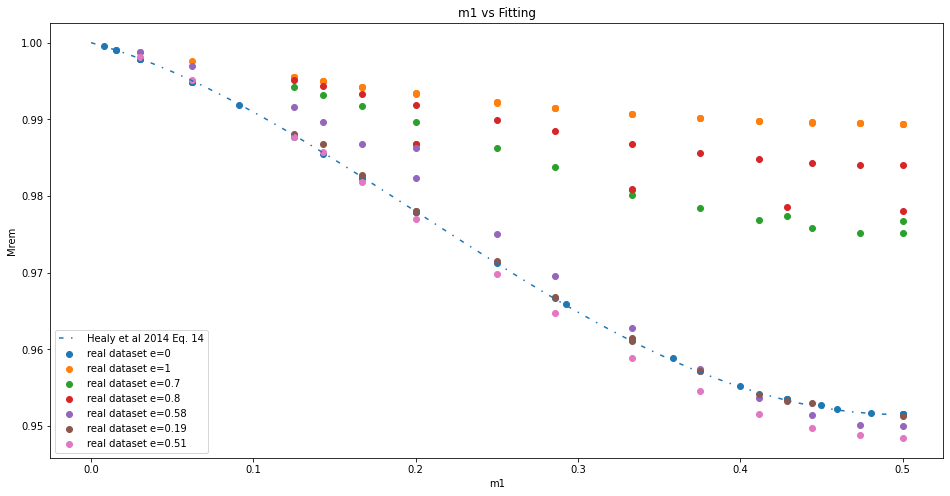

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
m1_values=np.arange(0,0.5,0.01)
ax.plot(m1_values, Mrem_formula(m1_values), label='Healy et al 2014 Eq. 14',ls=(0, (3, 5, 1, 5)),zorder=2)
ax.scatter(e0_data['initial_m1'],e0_data['final-mass'],label='real dataset e=0')
ax.scatter(e1_data['initial_m1'],e1_data['final-mass'],label='real dataset e=1')
ax.scatter(e7_data['initial_m1'],e7_data['final-mass'],label='real dataset e=0.7')
ax.scatter(e8_data['initial_m1'],e8_data['final-mass'],label='real dataset e=0.8')
ax.scatter(e58_data['initial_m1'],e58_data['final-mass'],label='real dataset e=0.58')
ax.scatter(e19_data['initial_m1'],e19_data['final-mass'],label='real dataset e=0.19')
ax.scatter(e51_data['initial_m1'],e51_data['final-mass'],label='real dataset e=0.51')

ax.set_title('m1 vs Fitting')
ax.set_xlabel('m1')
# ax.set_ylim([0,1])
ax.set_ylabel('Mrem')
ax.legend(loc='best')
plt.show()

In [ ]:
def Mrem_formula_fit(m1,M0,K2d,K4f,m=1):
    m2=m-m1
    delta_m=(m1-m2)/m
    eta=m1*m2/m**2
    
    
    Mrem_m=M0+K2d*delta_m**2+K4f*delta_m**4
    
    square_eta=(4*eta)**2*Mrem_m
    linear_eta=(1+eta*(Eisco(0)+11))*delta_m**6
    
    return m*(square_eta+linear_eta)

plot_with_fit(e0_data,Mrem_formula_fit,[0.951507,1.995246,2.98099])

In [17]:
def closest_value(input_list, input_value):
    arr = np.asarray(input_list)
    i = (np.abs(arr - input_value)).argmin()
    return arr[i]

def rf_predictor(e_data):
    e_prediction_list=[]
    initial_masses=e_data['initial_m1'].values
    m1_range=np.arange(0,0.5,0.01)
    
    for m1 in m1_range:
        m1_in_data=closest_value(initial_masses,m1)
        to_make_prediction=e_data[e_data['initial_m1']==m1_in_data]
        for index, row in to_make_prediction.iterrows():
            e_prediction_list.append([m1, row['e'], row['initial-separation'] ,row['#orbits']])

    df_e=pd.DataFrame(e_prediction_list,columns=['initial_m1','e','initial-separation','#orbits'])
    prediction_e=rf_regressor.predict(df_e)
    
    return df_e,prediction_e

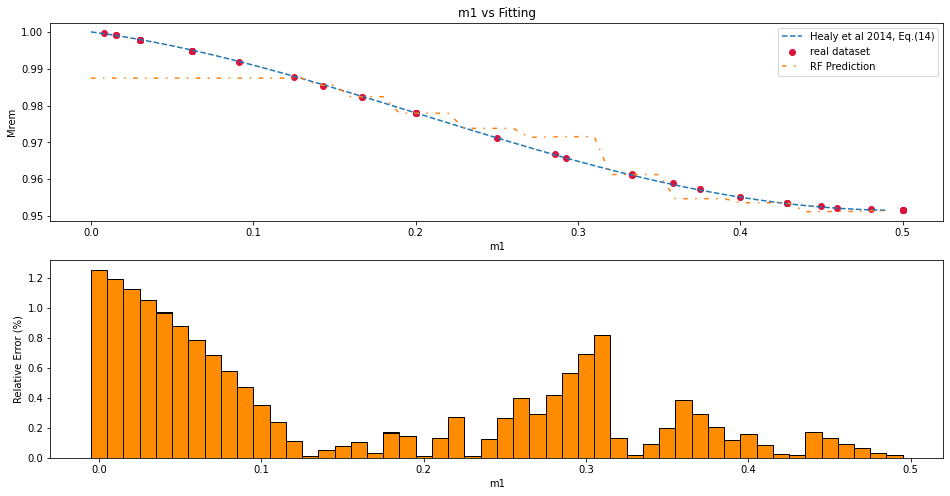

In [19]:
df_e0,prediction_e0=rf_predictor(e0_data)
fig, axs = plt.subplots(2,1,figsize=(16,8))
m1_values=np.arange(0,0.5,0.01)
axs[0].plot(m1_values, Mrem_formula(m1_values), label='Healy et al 2014, Eq.(14)',ls='dashed',zorder=2)
axs[0].scatter(e0_data['initial_m1'],e0_data['final-mass'],c='crimson',label='real dataset')
axs[0].plot(df_e0['initial_m1'], 1-np.ravel(prediction_e0), label='RF Prediction',ls=(0, (3, 5, 1, 5)),zorder=2)

axs[0].set_title('m1 vs Fitting')
axs[0].set_xlabel('m1')
axs[0].set_ylabel('Mrem')
axs[0].legend(loc='best')

axs[1].bar(df_e0['initial_m1'], abs(((1-np.ravel(prediction_e0))/Mrem_formula(df_e0['initial_m1'])-1)*100),color='darkorange',width=0.01,edgecolor='black')
axs[1].set_xlabel('m1')
axs[1].set_ylabel('Relative Error (%)')

plt.savefig('Mrem_e_0_Prediction_RandomForest_vs_Fit.png')

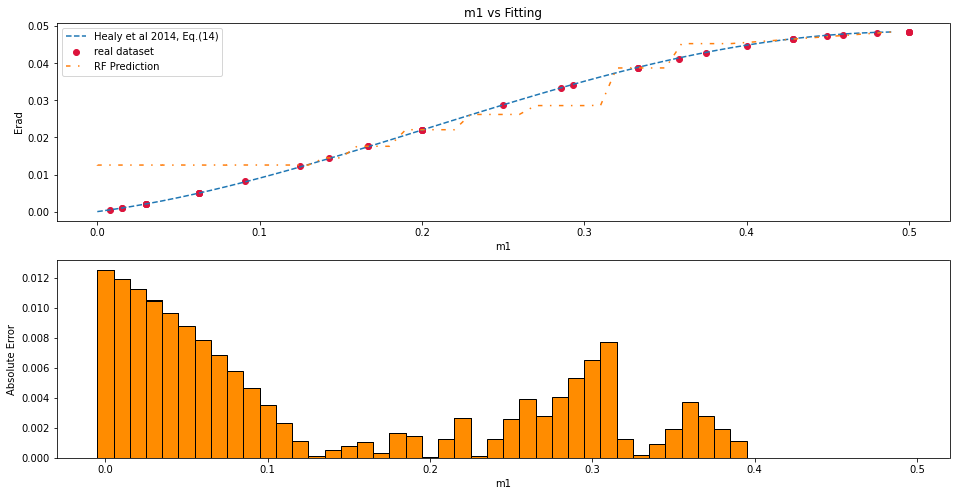

In [15]:
fig, axs = plt.subplots(2,1,figsize=(16,8))
m1_values=np.arange(0,0.5,0.01)
prediction_e0=rf_regressor.predict(df_e0)
axs[0].plot(m1_values, 1-Mrem_formula(m1_values), label='Healy et al 2014, Eq.(14)',ls='dashed',zorder=2)
axs[0].scatter(e0_data['initial_m1'],1-e0_data['final-mass'],c='crimson',label='real dataset')
axs[0].plot(df_e0['initial_m1'], np.ravel(prediction_e0), label='RF Prediction',ls=(0, (3, 5, 1, 5)),zorder=2)

axs[0].set_title('m1 vs Fitting')
axs[0].set_xlabel('m1')
axs[0].set_ylabel('Erad')
axs[0].legend(loc='best')
prediction_e0=rf_regressor.predict(df_e0)
Eradrem=1-Mrem_formula(df_e0['initial_m1'])
axs[1].bar(df_e0['initial_m1'], np.abs(Eradrem-np.ravel(prediction_e0)),color='darkorange',width=0.01,edgecolor='black')
axs[1].set_xlabel('m1')
axs[1].set_ylabel('Absolute Error')

plt.savefig('Erad_e_0_Prediction_RandomForest_vs_Fit.png')

Text(0, 0.5, 'Absolute Error')

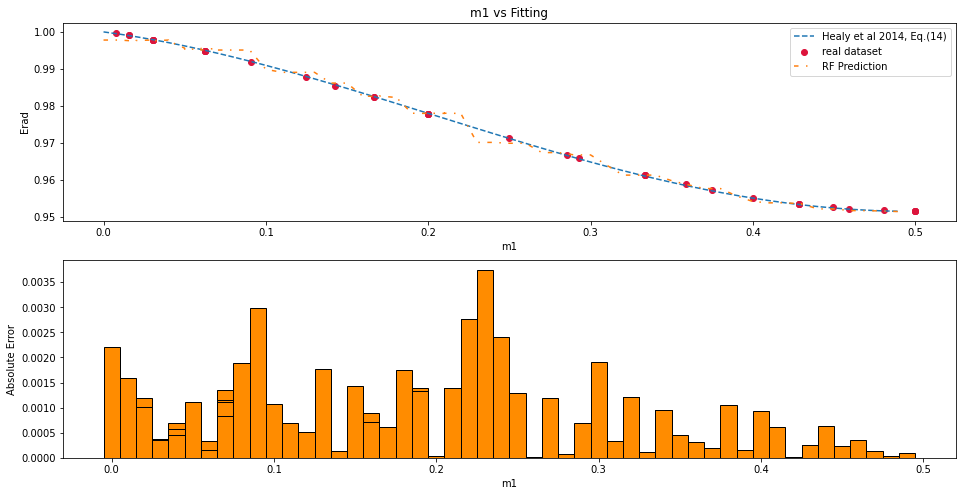

In [63]:
fig, axs = plt.subplots(2,1,figsize=(16,8))
m1_values=np.arange(0,0.5,0.01)
prediction_e0=rf_regressor.predict(df_e0)
axs[0].plot(m1_values, Mrem_formula(m1_values), label='Healy et al 2014, Eq.(14)',ls='dashed',zorder=2)
axs[0].scatter(e0_data['initial_m1'],e0_data['final-mass'],c='crimson',label='real dataset')
axs[0].plot(df_e0['initial_m1'], np.ravel(prediction_e0), label='RF Prediction',ls=(0, (3, 5, 1, 5)),zorder=2)

axs[0].set_title('m1 vs Fitting')
axs[0].set_xlabel('m1')
axs[0].set_ylabel('Erad')
axs[0].legend(loc='best')
prediction_e0=rf_regressor.predict(df_e0)
Eradrem=Mrem_formula(df_e0['initial_m1'])
axs[1].bar(df_e0['initial_m1'], np.abs(Eradrem-np.ravel(prediction_e0)),color='darkorange',width=0.01,edgecolor='black')
axs[1].set_xlabel('m1')
axs[1].set_ylabel('Absolute Error')

# plt.savefig('Erad_e_0_Prediction_RandomForest_vs_Fit.png')

Text(0, 0.5, 'Relative Error (%)')

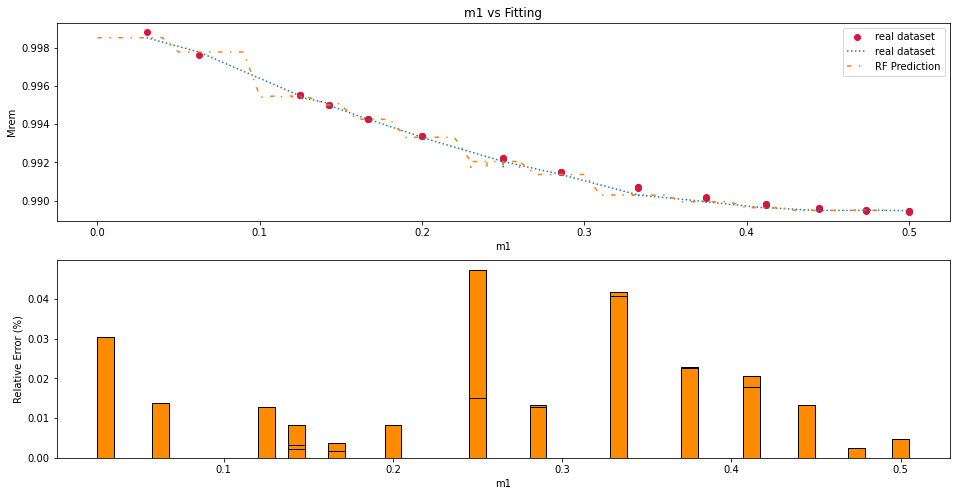

In [62]:
rf_regressor = joblib.load("./rf_regressor_generated_NS_Dataset_7480points+real_dataset.joblib")

df_e1,prediction_e1=rf_predictor(e1_data)
fig, axs = plt.subplots(2,1,figsize=(16,8))
m1_values=np.arange(0,0.5,0.01)
prediction_real_dataset=rf_regressor.predict(e1_data[['initial_m1','e','initial-separation','#orbits']])#1-
# axs[0].plot(m1_values, Mrem_formula(m1_values), label='Healy et al 2014, Eq.(14)',ls='dashed',zorder=2)
axs[0].scatter(e1_data['initial_m1'],e1_data['final-mass'],c='crimson',label='real dataset')
axs[0].plot(e1_data['initial_m1'], prediction_real_dataset, label='real dataset',ls='dotted',zorder=2)
axs[0].plot(df_e1['initial_m1'], np.ravel(prediction_e1), label='RF Prediction',ls=(0, (3, 5, 1, 5)),zorder=2)

axs[0].set_title('m1 vs Fitting')
axs[0].set_xlabel('m1')
axs[0].set_ylabel('Mrem')
axs[0].legend(loc='best')

axs[1].bar(e1_data['initial_m1'], np.abs((np.ravel(prediction_real_dataset)/e1_data['final-mass'].values)-1)*100,color='darkorange',width=0.01,edgecolor='black')
axs[1].set_xlabel('m1')
axs[1].set_ylabel('Relative Error (%)')

# plt.savefig('Mrem_e_0_Prediction_RandomForest_vs_Fit.png')

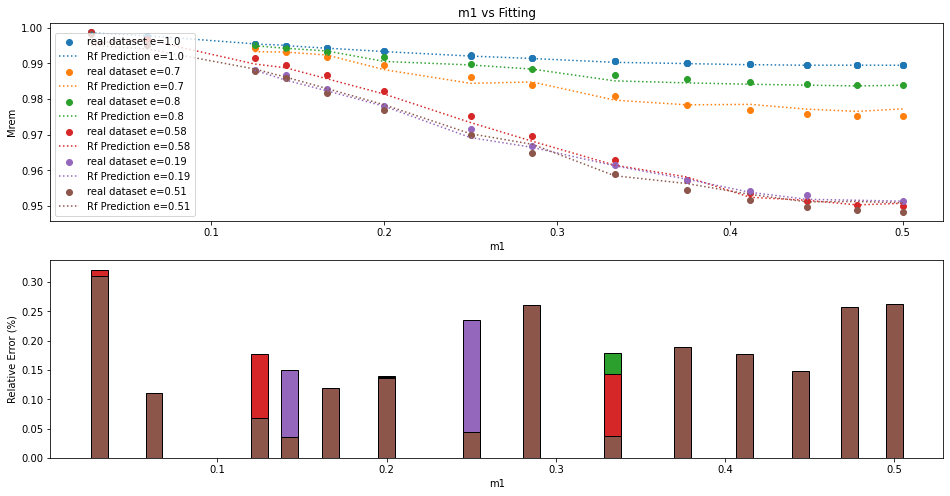

In [95]:
rf_regressor = joblib.load("./rf_regressor_generated_NS_Dataset_7480points+real_dataset.joblib")

e7_data=e7_data[e7_data['initial-separation']>=12]
e8_data=e8_data[e8_data['initial-separation']>=12]
e58_data=e58_data[e58_data['initial-separation']>=12]
e19_data=e19_data[e19_data['initial-separation']>=12]
e51_data=e51_data[e51_data['initial-separation']>=12]
datas=[e1_data,e7_data,e8_data,e58_data,e19_data,e51_data]
fig, axs = plt.subplots(2,1,figsize=(16,8))
m1_values=np.arange(0,0.5,0.01)

for data in datas:
    df_e,prediction_e=rf_predictor(data)
    prediction_real_dataset=rf_regressor.predict(data[['initial_m1','e','initial-separation','#orbits']])#1-
    axs[0].scatter(data['initial_m1'],data['final-mass'],label='real dataset e='+str(round(df_e['e'].iloc[0],2)))
    axs[0].plot(data['initial_m1'], prediction_real_dataset, label='Rf Prediction e='+str(round(df_e['e'].iloc[0],2)),ls='dotted',zorder=2)
    # axs.plot(df_e['initial_m1'], np.ravel(prediction_e), label='RF Prediction',ls=(0, (3, 5, 1, 5)),zorder=2)
    axs[1].bar(data['initial_m1'], np.abs((prediction_real_dataset/data['final-mass'].values)-1)*100,width=0.01,edgecolor='black')
    axs[1].set_xlabel('m1')
    axs[1].set_ylabel('Relative Error (%)')
    
axs[0].set_title('m1 vs Fitting')
axs[0].set_xlabel('m1')
axs[0].set_ylabel('Mrem')
axs[0].legend(loc='best')


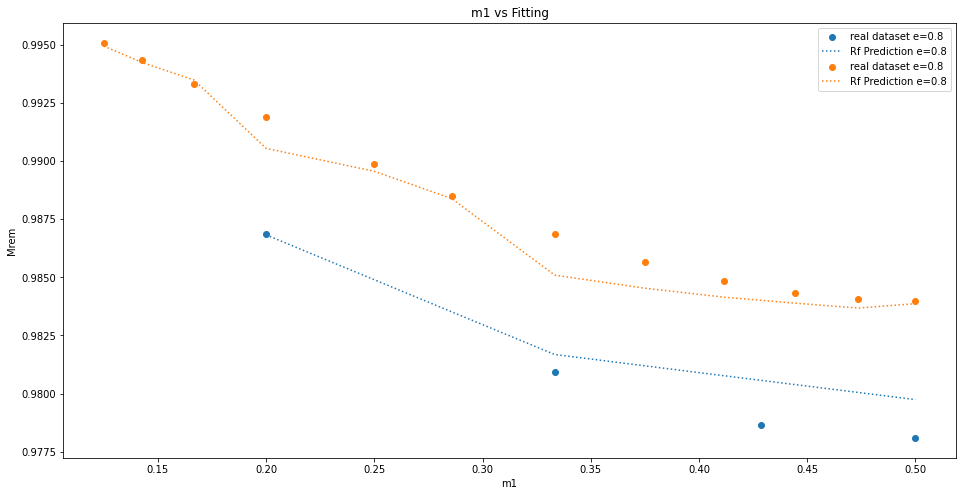

In [101]:
rf_regressor = joblib.load("./rf_regressor_generated_NS_Dataset_7480points+real_dataset.joblib")

e8_data=real_data[round(real_data['e'],2)==0.8]

datas=[e8_data]
fig, axs = plt.subplots(1,1,figsize=(16,8))
m1_values=np.arange(0,0.5,0.01)

for e_data in datas:
    e_data_11=e_data[e_data['initial-separation']<=12]
    e_data_24=e_data[e_data['initial-separation']>=12]
    
    df_e,prediction_e=rf_predictor(e_data_11)
    prediction_real_dataset=rf_regressor.predict(e_data_11[['initial_m1','e','initial-separation','#orbits']])#1-
    axs.scatter(e_data_11['initial_m1'],e_data_11['final-mass'],label='real dataset e='+str(round(df_e['e'].iloc[0],2)))
    axs.plot(e_data_11['initial_m1'], prediction_real_dataset, label='Rf Prediction e='+str(round(df_e['e'].iloc[0],2)),ls='dotted',zorder=2)
    
    df_e,prediction_e=rf_predictor(e_data_24)
    prediction_real_dataset=rf_regressor.predict(e_data_24[['initial_m1','e','initial-separation','#orbits']])#1-
    axs.scatter(e_data_24['initial_m1'],e_data_24['final-mass'],label='real dataset e='+str(round(df_e['e'].iloc[0],2)))
    axs.plot(e_data_24['initial_m1'], prediction_real_dataset, label='Rf Prediction e='+str(round(df_e['e'].iloc[0],2)),ls='dotted',zorder=2)
    
axs.set_title('m1 vs Fitting')
axs.set_xlabel('m1')
axs.set_ylabel('Mrem')
axs.legend(loc='best')